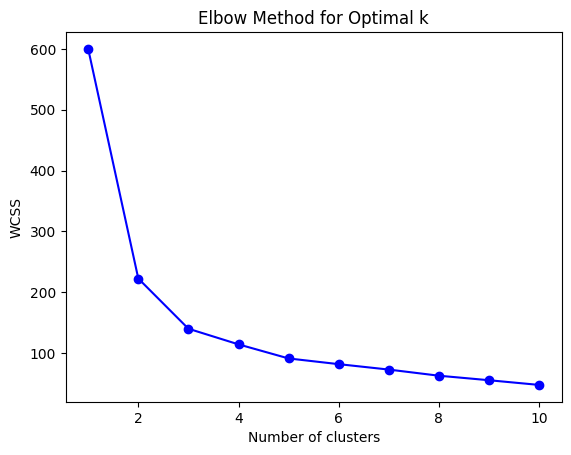

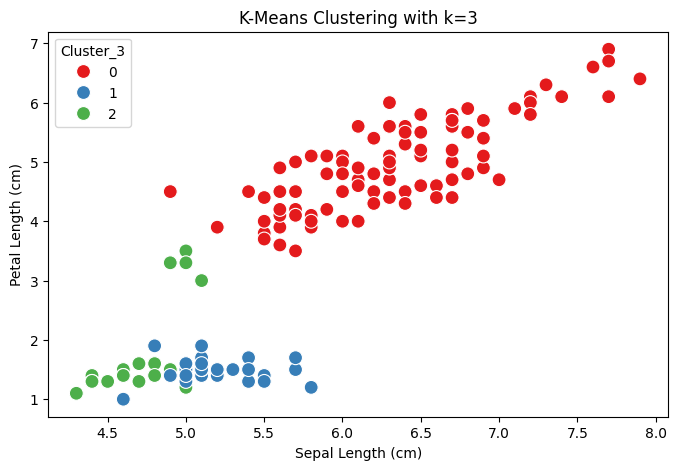

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: Sepal length, Sepal width, Petal length, Petal width
column_names = iris.feature_names  # Feature names from the dataset

# Convert to a DataFrame for easier handling
iris_df = pd.DataFrame(X, columns=column_names)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method
plt.plot(range(1, 11), wcss, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means with k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
iris_df['Cluster_3'] = kmeans_3.fit_predict(X_scaled)

# Visualizing the clusters using Sepal and Petal length/width
plt.figure(figsize=(8, 5))
sns.scatterplot(x=iris_df['sepal length (cm)'],
                y=iris_df['petal length (cm)'],
                hue=iris_df['Cluster_3'],
                palette='Set1',
                s=100)

plt.title('K-Means Clustering with k=3')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()
